In [13]:
import pandas as pd

data = pd.read_csv("train.csv")

# Select required columns
selected_data = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']]

selected_data.to_csv("selected_train.csv", index=False)


In [14]:
#Select Relevant Features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'
X = data[features]
y = data[target]

#Handle Missing Values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
import pandas as pd

# User input
sqft = float(input("Enter Living Area (GrLivArea in sq ft): "))
bedrooms = int(input("Enter number of Bedrooms: "))
full_bath = int(input("Enter number of Full Bathrooms: "))
half_bath = int(input("Enter number of Half Bathrooms: "))

# Create input as a DataFrame with column names
input_data = pd.DataFrame([{
    'GrLivArea': sqft,
    'BedroomAbvGr': bedrooms,
    'FullBath': full_bath,
    'HalfBath': half_bath
}])

# Predict the price
predicted_price = model.predict(input_data)[0]

print(f"\nEstimated House Price: ₹{round(predicted_price, 2)}")


Enter Living Area (GrLivArea in sq ft):  1710
Enter number of Bedrooms:  2
Enter number of Full Bathrooms:  1
Enter number of Half Bathrooms:  1



Estimated House Price: ₹208844.99


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("MSE:", MSE)


R^2 Score: 0.6335301929422245
MSE: 2810942965.2180653


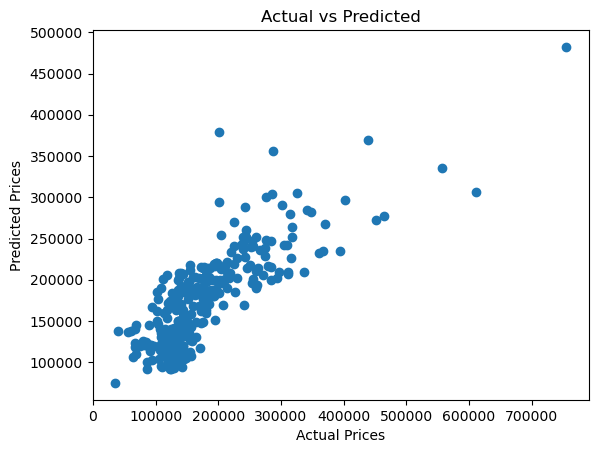

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()